<a href="https://colab.research.google.com/github/BastienCherel/Advanced-ML-I/blob/main/Lab1_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab 1: Bagging and Boosting Techniques in Ensemble Learning

#### **Objective**:
In this lab, you will implement and experiment with Bagging and Boosting techniques using Python libraries such as `scikit-learn`. The goal is to understand the concepts behind these ensemble methods and how they improve model performance through aggregation and boosting strategies.

#### **Prerequisites**:
- Basic understanding of Python and `scikit-learn`.
- Familiarity with Decision Trees, Bagging, and Boosting from Lecture 1.
- Required Libraries: `numpy`, `pandas`, `scikit-learn`, `matplotlib`, and `seaborn`.

### **1. Dataset Preparation**

We will use the **Breast Cancer dataset** from `scikit-learn`. It is a binary classification problem where the goal is to classify cancerous tumors as either benign or malignant.

#### **Step 1.1: Load and explore the dataset**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dataset overview
print(X.head())
print("\nTarget labels: \n", data.target_names)

# Split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

#### **Step 1.2: Initial Exploration**
- **Plot the distribution of classes** to check for any class imbalance.

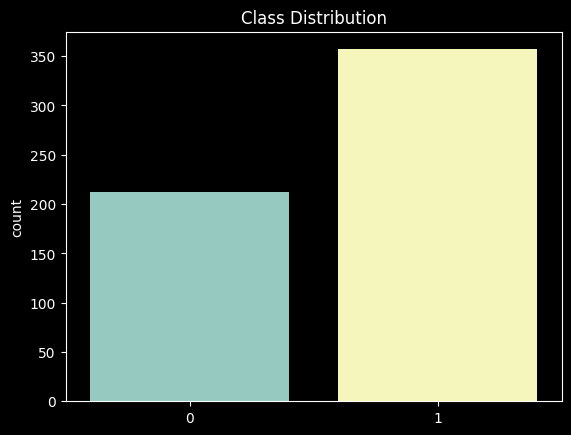

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [ ]:
# Check class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

# Basic statistics
print(X.describe())

### **2. Bagging: Random Forest**

In this section, you will implement Bagging using Random Forest, a popular Bagging algorithm that builds multiple decision trees and averages their predictions.

#### **Step 2.1: Train a Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Performance:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### **Step 2.2: Feature Importance Visualization**
- Visualize the most important features as determined by the Random Forest model.

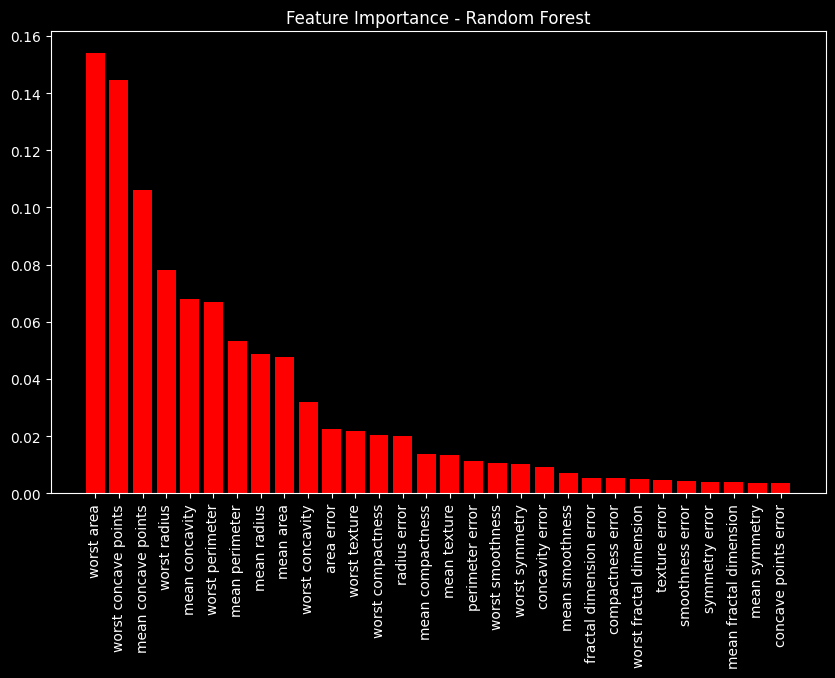

In [ ]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

### **3. Boosting: AdaBoost**

Next, we will implement Boosting using the AdaBoost algorithm, which focuses on misclassified samples in each iteration.

#### **Step 3.1: Train an AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base learner (weak learner)
base_learner = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoostClassifier with the base learner
adaboost_model = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
print("AdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, y_pred_adaboost))

AdaBoost Classifier Performance:
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### **Step 3.2: Plot AdaBoost Decision Boundary**
- Visualize how AdaBoost modifies the decision boundary after several boosting iterations.

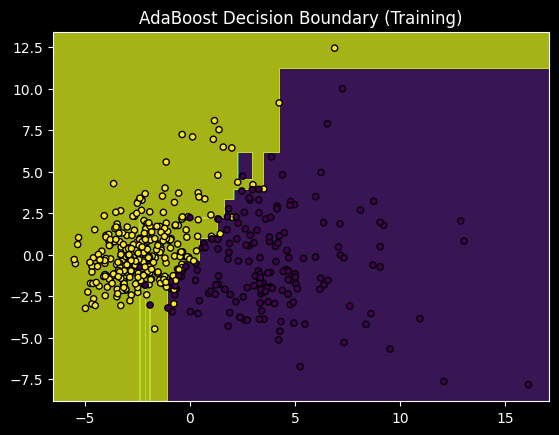

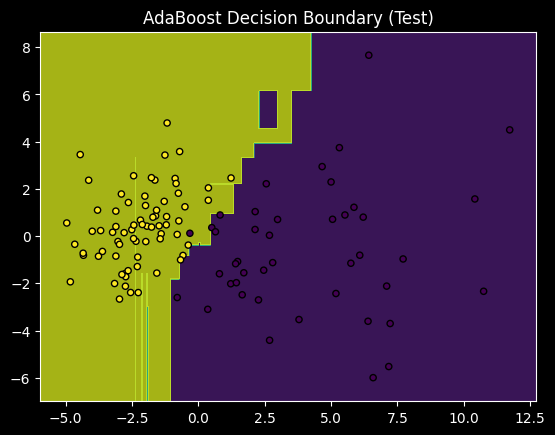

In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train AdaBoost on 2D data for decision boundary visualization
adaboost_2d_model = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1, random_state=42)
adaboost_2d_model.fit(X_train_2d, y_train)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

plot_decision_boundary(adaboost_2d_model, X_train_2d, y_train, "AdaBoost Decision Boundary (Training)")
plot_decision_boundary(adaboost_2d_model, X_test_2d, y_test, "AdaBoost Decision Boundary (Test)")

### **4. Comparison of Bagging vs. Boosting**

#### **Step 4.1: Compare Model Performance**
- Compare the performance of the Random Forest (Bagging) and AdaBoost (Boosting) models.

Random Forest Accuracy: 0.9649122807017544
AdaBoost Accuracy: 0.9736842105263158


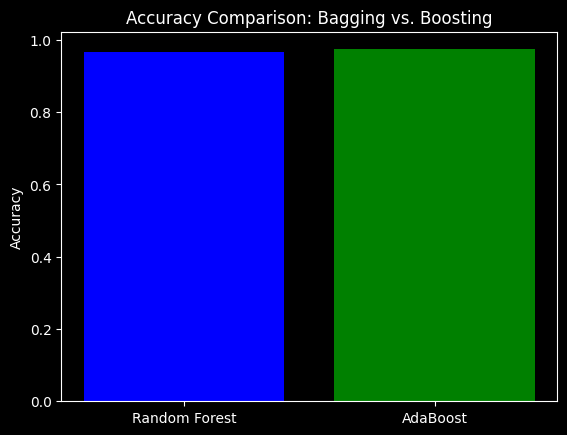

In [ ]:
# Performance comparison
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))

# Visualization of results
models = ['Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_adaboost)]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy Comparison: Bagging vs. Boosting')
plt.ylabel('Accuracy')
plt.show()

#### **Step 4.2: Discuss Results**
- Analyze and explain the results based on performance metrics:
  - Which model had a better accuracy score?
  - How does the choice of weak learners in Boosting impact the results?
  - In which scenarios would Bagging (Random Forest) outperform Boosting (AdaBoost), and vice versa?

AdaBoost has a better accuracy than random forest

### **5. Individual Work (Extra Exercises)**

#### **Exercise 1: Experiment with Hyperparameters**
- Tune the hyperparameters of both the Random Forest and AdaBoost models and evaluate how performance changes:
  - Adjust the number of estimators (trees/boosting rounds).
  - Experiment with different learning rates for AdaBoost.
  - Explore deeper or shallower trees as base learners in both models.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
rf_model = grid_search.best_estimator_


# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs= -1)

# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
tuned_y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, tuned_y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_y_pred_rf))
print("Classification Report:\n", classification_report(y_test, tuned_y_pred_rf))

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classifier Performance:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

AdaBoost Classifier Performance:
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg  

In [ ]:
param_grid = {
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.25,0.30, 0.35],
}
# Initialize the base learner (weak learner)
base_learner = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Initialize the AdaBoostClassifier with the base learner
adaboost_model = AdaBoostClassifier(estimator=base_learner,random_state=42)

#
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
adaboost_model = grid_search.best_estimator_


# Make predictions
tuned_y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
print("AdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, tuned_y_pred_adaboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_y_pred_adaboost))
print("Classification Report:\n", classification_report(y_test, tuned_y_pred_adaboost))

Best parameters found:  {'learning_rate': 0.25, 'n_estimators': 150}
AdaBoost Classifier Performance:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Random Forest Accuracy: 0.9649122807017544
AdaBoost Accuracy: 0.9736842105263158


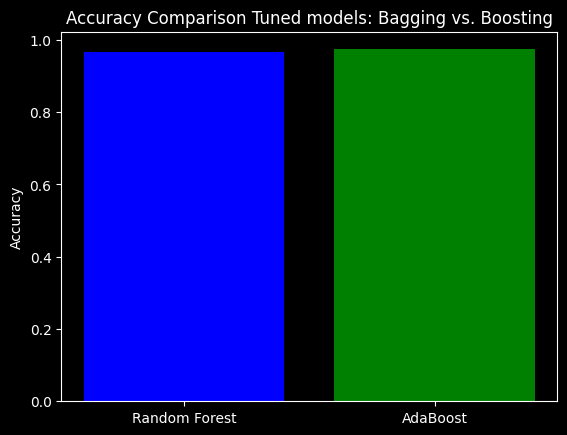

In [ ]:
# Performance comparison
print("Random Forest Accuracy:", accuracy_score(y_test, tuned_y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, tuned_y_pred_adaboost))

# Visualization of results
models = ['Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, tuned_y_pred_rf), accuracy_score(y_test, tuned_y_pred_adaboost)]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy Comparison Tuned models: Bagging vs. Boosting')
plt.ylabel('Accuracy')
plt.show()

#### **Exercise 2: Try Different Datasets**
- Apply Bagging and Boosting methods to another dataset, such as the **Iris** or **Wine Quality** dataset, and compare the results. Use the following `scikit-learn` functions to load these datasets:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target labels: 
 ['setosa' 'versicolor' 'virginica']
Best parameters found:  {'learning_rate': 0.3, 'n_estimators': 100}
Random Forest Accuracy: 1.0
AdaBoost Accuracy: 1.0


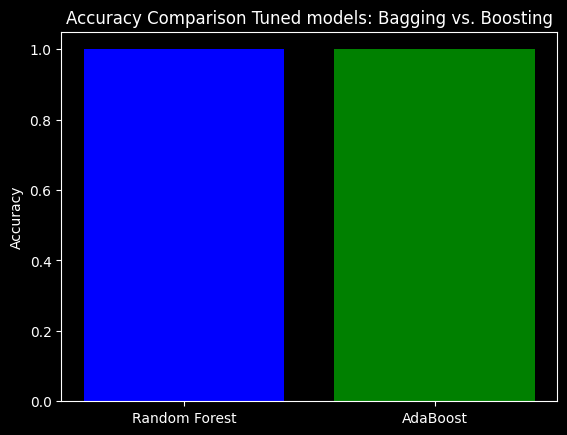

In [ ]:
from sklearn.datasets import load_iris, load_wine

iris_data = load_iris()


X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.Series(iris_data.target)

# Dataset overview
print(X.head())
print("\nTarget labels: \n", iris_data.target_names)

# Split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
rf_model = grid_search.best_estimator_


# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs= -1)

# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
tuned_y_pred_rf = rf_model.predict(X_test)

param_grid = {
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.25,0.30, 0.35],
}
# Initialize the base learner (weak learner)
base_learner = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Initialize the AdaBoostClassifier with the base learner
adaboost_model = AdaBoostClassifier(estimator=base_learner,random_state=42)

#
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
adaboost_model = grid_search.best_estimator_


# Make predictions
tuned_y_pred_adaboost = adaboost_model.predict(X_test)

# Performance comparison
print("Random Forest Accuracy:", accuracy_score(y_test, tuned_y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, tuned_y_pred_adaboost))

# Visualization of results
models = ['Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, tuned_y_pred_rf), accuracy_score(y_test, tuned_y_pred_adaboost)]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy Comparison Tuned models: Bagging vs. Boosting')
plt.ylabel('Accuracy')
plt.show()

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

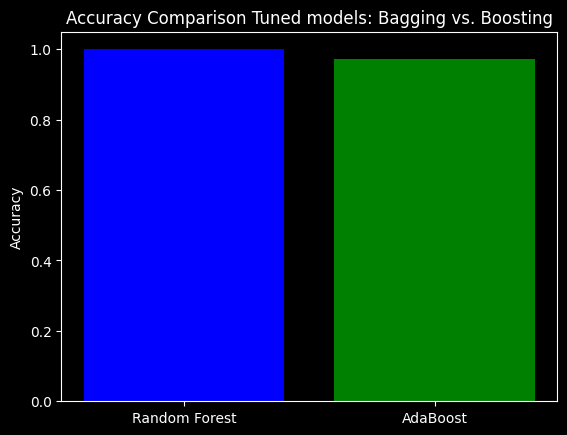

In [ ]:
wine_data = load_wine()

X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target)

# Dataset overview
print(X.head())
print("\nTarget labels: \n", wine_data.target_names)

# Split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
rf_model = grid_search.best_estimator_


# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs= -1)

# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
tuned_y_pred_rf = rf_model.predict(X_test)

param_grid = {
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.25,0.30, 0.35],
}
# Initialize the base learner (weak learner)
base_learner = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Initialize the AdaBoostClassifier with the base learner
adaboost_model = AdaBoostClassifier(estimator=base_learner,random_state=42)

#
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
adaboost_model = grid_search.best_estimator_


# Make predictions
tuned_y_pred_adaboost = adaboost_model.predict(X_test)

# Performance comparison
print("Random Forest Accuracy:", accuracy_score(y_test, tuned_y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, tuned_y_pred_adaboost))

# Visualization of results
models = ['Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, tuned_y_pred_rf), accuracy_score(y_test, tuned_y_pred_adaboost)]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy Comparison Tuned models: Bagging vs. Boosting')
plt.ylabel('Accuracy')
plt.show()

### **Conclusion**

In this lab, you explored the concepts of Bagging and Boosting using Random Forest and AdaBoost. You applied these ensemble methods to a real-world dataset, analyzed their performance, and learned how hyperparameter tuning can affect the results. These techniques are foundational for improving classification accuracy, particularly in cases where simple models (e.g., decision trees) might fail to generalize well.